In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_25587/1430452183.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_metrics['Model'] = important_metrics['Model'].replace({
/tmp/ipykernel_25587/1430452183.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_accuracy = important_metrics.pivot("Model", "Dataset", "Accuracy")


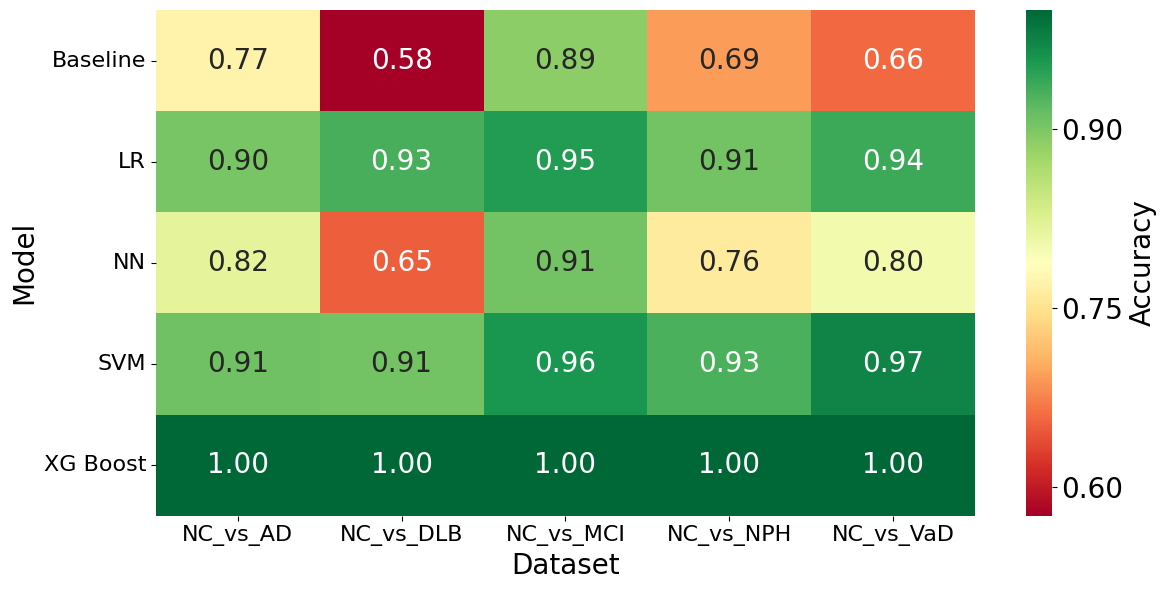

In [15]:
# Paths to the datasets
metric_files = {
    'NC_vs_AD': '/home/aghasemi/CompBio481/ML_classifiers/ML_classifiers_results/ad_vs_nc_model_performance_metrics.csv',
    'NC_vs_DLB': '/home/aghasemi/CompBio481/ML_classifiers/ML_classifiers_results/dlb_vs_nc_model_performance_metrics.csv',
    'NC_vs_MCI': '/home/aghasemi/CompBio481/ML_classifiers/ML_classifiers_results/mci_vs_nc_model_performance_metrics.csv',
    'NC_vs_NPH': '/home/aghasemi/CompBio481/ML_classifiers/ML_classifiers_results/nph_vs_nc_model_performance_metrics.csv',
    'NC_vs_VaD': '/home/aghasemi/CompBio481/ML_classifiers/ML_classifiers_results/vad_vs_nc_model_performance_metrics.csv'
}

# Consolidate metrics from all files
all_metrics = pd.DataFrame()

for condition, path in metric_files.items():
    temp_df = pd.read_csv(path)
    temp_df['Dataset'] = condition  # Add dataset label for identification
    all_metrics = pd.concat([all_metrics, temp_df], ignore_index=True)

# Assuming we need 'Model', 'Accuracy', and 'AUC-ROC' columns
important_metrics = all_metrics[['Model', 'Accuracy', 'AUC-ROC', 'Dataset']]

# Add spaces to model names
important_metrics['Model'] = important_metrics['Model'].replace({
    'LogisticRegression': 'LR',
    'RandomForest': 'RF',
    'SVM': 'SVM',  # Assuming SVM is already correct
    'XGBoost': 'XG Boost'
}, regex=True)

# Pivot the DataFrame for heatmap visualization
heatmap_data_accuracy = important_metrics.pivot("Model", "Dataset", "Accuracy")

plt.figure(figsize=(12, 6))  # Adjusting the overall size of the heatmap
ax1 = sns.heatmap(heatmap_data_accuracy, annot=True, cmap='RdYlGn', fmt=".2f",
                  cbar_kws={'label': 'Accuracy'}, annot_kws={"size": 20})  # Bigger font size for annotations
plt.ylabel('Model', fontsize=20)
plt.xlabel('Dataset', fontsize=20)

# Rotate model names to be vertical
plt.yticks(rotation=90)
plt.xticks()

# Adjusting the color bar to show specific numbers
colorbar = ax1.collections[0].colorbar
colorbar.set_ticks([0.60, 0.75, 0.90])  # Set ticks at specific values
colorbar.set_ticklabels(['0.60', '0.75', '0.90'], fontsize=20)  # Label ticks with the actual values
colorbar.set_label('Accuracy', fontsize=20)  # Set the font size for the color bar label
plt.xticks(fontsize=16)
plt.yticks(fontsize=16, rotation=0)  # Increase font size for y-axis ticks and set rotation to horizontal

# Save the figure for Accuracy with high DPI for better resolution
plt.savefig('/home/aghasemi/CompBio481/ML_classifiers/ML_classifiers_results/model_accuracy_heatmap.png', dpi=300, format='png')

plt.tight_layout()
plt.show()